* Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Or, alternatively, **Restart & Run All**.

* Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

* You can always add additional cells to the notebook to experiment, to test your answers, or to provide additional support for your answers.

* You should not need to install new packages to complete an assignment. If you use any packages not available via the MATH405 `Project.toml` then your assignment will likely not be graded correctly.

* Submissions are only accepted via CANVAS!

* Late submissions: within 24h I will reduce the grade to 70%. I will not accept submissions after 24h. Please manage your time well and complete the assignments with plenty of buffer time.

* By entering your name below you confirm that you have completed this assignment on your own and without (direct) help from your colleagues. Plagiarism / copying will be checked by comparing assignments and by by testing understanding in workshops and the oral exam (final). I reserve the option to downgrade an assignment at any point.

In [1]:
NAME = "William Choi"

"William Choi"

---

# MATH 405/607 

# Numerical Methods for Differential Equations

## Assignment 1

This assignment contains a review of Taylor's theorem, a bit of floating point arithmetic and some elementary linear algebra and numerical linear algebra. It serves primarily as a warm-up and introduction to using Jupyter notebooks. To install Julia, Jupyter and to learn how to use the notebooks, please look at the `[WS1]` notebook.



* **Due date:** Tue 22 September 2020, 1200 noon
* 70 points (out of 85) will count at 100%

In [2]:
include("math405.jl")

 Activating environment at `C:\Users\choiw\Desktop\Assignments\math405_2020W\assignments\A1\Project.toml`


### Question 1: [5+5]

(a) Let $f : \mathbb{R} \to \mathbb{R}$ be smooth (as often differentiable as needed). Write down the expression for the $n$th degree Taylor polynomial $T_n(x)$ expanded around $0$.

(b) Let $R_n(x)$ be the remainder, i.e. $f(x) = T_n(x) + R_n(x)$. Look up the Lagrange form of the remainder as well as the integral form of the remainder and write them down.

(a)
$$
T_n(x) = f(0) + f'(0)(x-0) + \frac{f"(0)}{2!}(x-0)^2 + \dots + \frac{f^n(0)}{n!}(x-0)^n\\[10pt]
T_n(x) = \sum_{i=0}^{n} \frac{f^{(i)}(0)}{i!}x^i
$$

(b)

Lagrange form:
$$
    R_n(x) = \frac{f^{(n+1)}(c)}{(n+1)!}(x-0)^{n+1} \;\;\; \text{where $c$ is some number between $a$ and $x$}
$$

Integral form:
$$
R_n(x) = \frac{1}{n!}\int_{t=a}^{x}f^{(n+1)}(t)(x-t)^{n}dt
$$

### Question 2 [5+5]

(a) Consider the centered finite-difference formula 
$$
    \frac{f(x+h) - f(x-h)}{2h} \approx f'(x)
$$
Prove that it is second-order accurate by deriving a sharp error bound in terms of $h$ and $\|f^{(j)}\|_\infty$ where you should determine $j$. 

(b+) Construct a finite-difference approximation for the third derivative $f'''(x)$. 

(a)
If you taylor expand the terms in the numerator of the LHS expression, you get the following.
$$
f(x+h) = f(x) + f'(x)h + \frac{f"(x)}{2}h^2 + \frac{f^{3}(c_1)}{3!}h^3 \\
f(x-h) = f(x) - f'(x)h + \frac{f"(x)}{2}h^2 - \frac{f^{3}(c_2)}{3!}h^3 \\
$$

If you subtract the two expressions above, you get the following.
$$
f(x+h) - f(x-h) = 2hf'(x) + \frac{f^{3}(c_1)}{3!}h^3 + \frac{f^{3}(c_2)}{3!}h^3 \\
\frac{f(x+h) - f(x-h)}{2h} = f'(x) + \frac{h^2(f^{3}(c_1)+f^{3}(c_2))}{12}\\
$$

Therefore, the resulting sharp bound on the error is the following.
$$
\frac{f(x+h) - f(x-h)}{2h} - f'(x) = \frac{h^2(f^{3}(c_1)+f^{3}(c_2))}{12} \leq \frac{h^{2}\|f^{3}\|_{\infty}}{6}\\
$$

(b)

Expand the taylor series
$$
f(x+h) = f(x) + f'(x)h + \frac{f"(x)}{2}h^2 + \frac{f^{3}(x)}{3!}h^3 + \frac{f^{4}(x)}{4!}h^4 + \frac{f^{5}(c_1)}{5!}h^5\\
f(x-h) = f(x) - f'(x)h + \frac{f"(x)}{2}h^2 - \frac{f^{3}(x)}{3!}h^3 + \frac{f^{4}(x)}{4!}h^4 - \frac{f^{5}(c_2)}{5!}h^5\\
f(x+2h) = f(x) + f'(x)2h + \frac{f"(x)}{2}(2h)^2 + \frac{f^{3}(x)}{3!}(2h)^3 + \frac{f^{4}(x)}{4!}(2h)^4 + \frac{f^{5}(c_1)}{5!}(2h)^5\\
f(x-2h) = f(x) - f'(x)2h + \frac{f"(x)}{2}(2h)^2 - \frac{f^{3}(x)}{3!}(2h)^3 + \frac{f^{4}(x)}{4!}(2h)^4 - \frac{f^{5}(c_2)}{5!}(2h)^5\\
$$

Multiply and add the taylor series found above.
$$
f(x+h) - f(x-h) = 2hf'(x) + 2h^{3}\frac{f^{3}(x)}{3!} + \frac{f^{5}(c_1)}{5!}h^5 + \frac{f^{5}(c_2)}{5!}h^5\\ = 2hf'(x) + 2h^{3}\frac{f^{3}(x)}{3!} + O(h^5)\\
f(x+2h) - f(x-2h) = 4hf'(x) + 2\frac{f^{3}(x)}{3!}(2h)^3 + \frac{f^{5}(c_1)}{5!}(2h)^5 + \frac{f^{5}(c_2)}{5!}(2h)^5\\ = 4hf'(x) + 2\frac{f^{3}(x)}{3!}(2h)^3 + O(h^5)
$$

The primary goal here is to remove the $f'(x)$ term, only leaving $f^3(x)$ on the RHS.
$$
f(x+2h)- f(x-2h) - 2(f(x+h) - f(x-h)) = 2\frac{f^{3}(x)}{3!}(2h)^3 - 4h^{3}\frac{f^{3}(x)}{3!} + O(h^5) \\
f(x+2h)- f(x-2h) - 2(f(x+h) - f(x-h)) = f^{3}(x)2h^{3}+ O(h^5) \\
\frac{f(x+2h)- f(x-2h) - 2(f(x+h) - f(x-h))}{2h^3} = f^{3}(x) + O(h^2)\\
$$

Simplifying further we get the following final expression for the finite difference approximation of a third derivative. The approximation is second-order accurate.
$$
\frac{0.5f(x+2h) - f(x+h) + f(x-h) - 0.5f(x-2h))}{h^3} = f^{3}(x) + O(h^2)\\
$$


### Question 3 [5+5+10]

Consider the function $f(x) = \exp(x)$, evaluated in floating point arithmetic. Suppose we wish to approximate its first derivative $f'(x) = \exp(x)$ by a finite difference. 

(a) For the forward difference, a floating point analysis yields 
$$
    {\rm fl}\Big[ \frac{f(x+h) - f(x)}{h} \Big] = f'(x) + O(h) + O(\epsilon h^{-1}).
$$
where $\epsilon$ is machine precision. Produce a figure or table that clearly demonstrates this behaviour. 

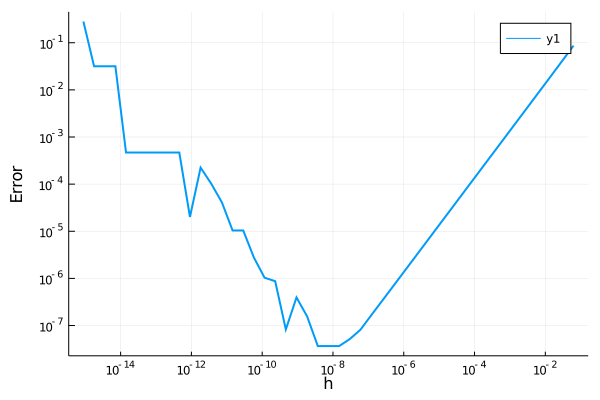

In [3]:
f = x -> exp(x)
df = x -> exp(x)
x0 = 1
hh = 0.5.^(4:50)
error = [abs((f(x0+h) - f(x0))/h - df(x0)) for h in hh]
plot(hh, error, xaxis=:log, yaxis=:log, xlabel="h", ylabel="Error", lw=2)

Question 3 continued ...

(b) For `Float64` precision $\epsilon \approx 10^{-16}$ (cf. `eps(Float64)`) How would you choose $h$? How would you choose $h$ for `Float32` precision?

(c+) What is the corresponding estimate for the centered difference from Q2a and how does it affect your choice of $h$?

(b)

The key is to choose h such that the errors are balance. You want the $O(h)$ and $O(\epsilon h^{-1})$ terms to be the same. This occurs when $h = \sqrt{\epsilon}$. In the case of Float64, this happens at $10^{-8}$ as shown in the plot in part (a). The error is minimized around $10^{-8]$.  

For Float32 the machine precision is roughly $10^{-7}$. So, taking a square root would yield $10^{-7/2}$ for the appropriate value of h.

(c) 

The expression for centered finite difference reduces down to essentially the same form. The difference here is that the expression is second order accurate and therefore, one of the error term's $O(h^2)$.
$$
  fl\Big[\frac{f(x+h) - f(x-h)}{2h}\Big] = \frac{f(x+h) - f(x-h)}{2h} + O(\epsilon/h) \\
  fl\Big[\frac{f(x+h) - f(x-h)}{2h}\Big] = f'(x) + O(h^2) + O(\epsilon/h) \\
$$
As metioned in part (b), the two error terms need to be balanced. This means that $ h^2 \approx \epsilon/h$. Solving for h results in $h = \epsilon^(1/3)$. So, in the case of centered difference, $\epsilon^(1/3)$ is an appropriate value of h.


In all subsequent questions: $\mathbb{F} \in \{ \mathbb{R}, \mathbb{C}\}$.

### Question 4 [5]

If $A, B \in \mathbb{F}^{N \times N}$ are invertible then $C = AB$ is also invertible and $C^{-1} = B^{-1} A^{-1}$. Check this result numerically, by testing the identity for randomly chosen matrices. As an exception you may use the `inv` command.

In [4]:
# Create Random  Matrices
A = rand(5,5)
B = rand(5,5)
println(inv(A*B) ≈ inv(B)*inv(A))

true


### Question 5 [5+5+10]

(a) Construct a right-hand side $b$ such that the system 
$$ 
   A x = b, \qquad \text{where} \quad 
   A = \begin{pmatrix}
       2 & 1 & 0 & 2 \\ 
       3 & 1 & 1 & 4 \\ 
       4 & 1 & 2 & 6 \\ 
       5 & 1 & 3 & 8 
   \end{pmatrix}
$$
has no solution. In the solution cell enter this right-hand side as 
```julia 
b = [ # insert elements
```

(b) For $b = 0$ compute the set of all solutions to the system in (a) (i.e. the null-space of the system matrix). In the solution cell, enter your solution as a matrix
```julia 
N = # enter the definition of the null space 
```
such that the columns `N[:, i]` span the space of all solutions.

(c+) For the system that you derived in (a) which has no solution, find the "regularised least squares solution" i.e. 
$$
    x = \arg\min \| A x - b \|^2 + \|x\|^2
$$
In the solution cell, enter this solution as 
```julia 
x = # enter the definition of the solution   
```

In [5]:
A = [ 2 1 0 2
      3 1 1 4
      4 1 2 6
      5 1 3 8 ]
##########
# PART A #
##########
# Rank of A is two meaning that the column space of A is spaned by two vectors.
# Upon converting the matrix the row echelon form, the pivots indicate that [2 3 4 5] and [1 1 1 1]
# are the basis vectors of A.
# For Ax = b to have a solution, b has to be the space spanned by the aforementioned two vectors.
# Otherwise, the system doesn't have a solution. We can guarantee that b isn't in the column space of A
# by ensuring that the basis vectors of A and b are linearly independent.

b = [1 2 1 1]

# Testing: if rank of the matrix below is 3 then, b is not in the column space of A
test = [2 1 1
        3 1 2
        4 1 1
        5 1 1]
rank(test) == 3

##########
# PART B #
##########
# Reduce A to "reduced row echelon form". 

N = [-1 -2
      2  2
      1  0 
      0  1]

# Testing: the result should be zero.
A*N*rand(2,1)

##########
# PART C #
##########
# Explanation added in markdown below. b is transposed to convert it to a column vector.
x = inv(A'A + I)*A'*b'

4×1 Array{Float64,2}:
  0.34538878842676357
  0.33453887884267564
 -0.3236889692585907
  0.02169981916817365

(c)

A and b can be restructured to include the regularization term. This reduces the expression back to the linear least squares.
$$
\| A x - b \|^2 + \|x\|^2 = \| A_0 x - b_0 \|^2 \\
A_0 = \Big[ A; I\Big] \\
b_0 = \Big[ b; zeros(size(x))\Big]
$$

Find x such that gradient is minimized.
$$
\nabla(\| A_0x-b_0\|^2) = 2A_0^{T}(A_0x-b_0) = 0 \\
A_0^{T}A_0x = A_0^{T}b \\
x = (A_0^{T}A_0)^{-1}A_0^{T}b
$$

Re-expressing the above expression for x in terms of original A and b
$$
x = (A^TA + I)^{-1}A^Tb
$$

### Question 6 [5+5]

Find out how to use Julia's LU factorisation `lu` with *AND WITHOUT* partial pivoting, and find out how to compute the condition number of a matrix.

The codes `system1()` and `system2()` below will produce two linear systems.  Solve them with and without pivoting and comment on your observations. How is the result related to the condition numbers?

(5 points for code + 5 points for discussion)

In [6]:
Random.seed!(3)

system1() = randn(500, 500), randn(500)

function system2()
    A = randn(500,500)
    for n = 1:500
        A[n,n] *= 1e-12
    end 
    b = randn(500)
    return A, b 
end

# YOUR CODE HERE
A1, b1 = system1()
A2, b2 = system2()

# No Pivoting
L1_np, U1_np, p1_np = lu(A1, Val(false))
x1_np = U1_np\(L1_np\b1[p1_np])
L2_np, U2_np, p2_np = lu(A2, Val(false))
x2_np = U2_np\(L2_np\b2[p2_np])

# # Pivoting
L1_p, U1_p, p1_p = lu(A1)
x1_p = U1_p\(L1_p\b1[p1_p])
L2_p, U2_p, p2_p = lu(A2)
x2_p = U2_p\(L2_p\b2[p2_p])

println("System 1: no pivoting vs. pivoting")
@show norm(A1*x1_np-b1), norm(A1*x1_p-b1)
println("System 2: no pivoting vs. pivoting")
@show norm(A2*x2_np-b2), norm(A2*x2_p-b2)

# Condition Number
cond1 = norm(A1)*norm(inv(A1))
cond2 = norm(A2)*norm(inv(A2))

println("Condition Number: System 1 vs. System 2")
@show cond1, cond2

System 1: no pivoting vs. pivoting
(norm(A1 * x1_np - b1), norm(A1 * x1_p - b1)) = (4.5298083617618044e-10, 2.5327559112567555e-12)
System 2: no pivoting vs. pivoting
(norm(A2 * x2_np - b2), norm(A2 * x2_p - b2)) = (0.05622822876602502, 1.0265458793901108e-12)
Condition Number: System 1 vs. System 2
(cond1, cond2) = (21726.33051315123, 11098.718342377622)


(21726.33051315123, 11098.718342377622)

Upon solving both systems with and without pivoting, solving without pivoting yielded greater errors (norm of the residual) in both cases. However, not pivoting had a much greater impact on system 2 leading to an error that several orders of magnitude greater than the pivoted counterpart. This is due to the main diagonal of system 2 being populated with small floating point numbers. Gaussian elimination works by converting model A into a upper triangular matrix by populating elements with zero using row operations. This proceeds in a top-down, left-right fashion. This leads to repeated division by the small floating point number along the diagonal which negatively affects the numerical stability of the system. One can also verify this by looking at the output of lu factorization; there are many large numbers resulting from the division.\\

As for the condition number, system 1 is roughly two times greater than system 2. Condition number is an amplification factor for the relative error of the data that helps bound the relative error of the solution. The above result indicates that system 1 is less stable than system 2. This does not affect the error due to not pivoting as that's due to error with floating point calculations.

### Question 7 [5+10]

The *entropy* (measure of disorder / randomness) for a multivariate Gaussian distribution with covariance $\Sigma$ is given by 
$$
    S = \log\det\Sigma
$$
In this question we will come up with an efficient and numerically stable algorithm to compute this.

(a+) Observe the result of the following naive simulation and in the cell below explain what you have observed, relating it to properties of `Float64` floating point arithmetic.



In [7]:
Random.seed!(0)
for N in (2).^(4:10)
    A = randn(N, N)  # random matrix
    A = A * A'       # symmetric and positive definite 
    @show log(det(A))
end    

log(det(A)) = 29.57833090452126
log(det(A)) = 82.22278128218313
log(det(A)) = 198.30226035015812
log(det(A)) = 493.8257777140677
log(det(A)) = Inf
log(det(A)) = Inf
log(det(A)) = Inf


In [8]:
# use this cell to experiment
Random.seed!(0)
for N in (2).^(4:10)
    A = randn(N, N)  # random matrix
    A = A * A'       # symmetric and positive definite 
    eigenvalues = eigen(A).values
    entropy = 0
    for val in eigenvalues
        entropy += log(val)
    end
    @show N
    @show entropy
    @show det(A)
    @show prod(eigenvalues)
end    

floatmax(Float64)

N = 16
entropy = 29.57833090452123
det(A) = 7.009804336429675e12
prod(eigenvalues) = 7.009804336429477e12
N = 32
entropy = 82.22278128218282
det(A) = 5.115642627523491e35
prod(eigenvalues) = 5.1156426275219475e35
N = 64
entropy = 198.30226035015926
det(A) = 1.323053539635243e86
prod(eigenvalues) = 1.323053539636782e86
N = 128
entropy = 493.82577771406784
det(A) = 2.9228752701043716e214
prod(eigenvalues) = 2.922875270105087e214
N = 256
entropy = 1157.887003089666
det(A) = Inf
prod(eigenvalues) = Inf
N = 512
entropy = 2684.223307816881
det(A) = Inf
prod(eigenvalues) = Inf
N = 1024
entropy = 6063.255345354044
det(A) = Inf
prod(eigenvalues) = Inf


1.7976931348623157e308

The simulation attempts to calculate the entropy for matrices of size ranging from 16x16 to 1024x1024. What we observe in the naive version of the simulation is that the entropy can't be determined for matrices of size greater than 128x128. The returned value is "Inf". \\ 

The problem here is that the determinant starts blowing up. While the magnitude of entropy remains relatively small due to the log, the determinant which is the preceding step to calculating the log increases rapidly as the size of the matrix increases. When the matrix size is 128x128, the determinant is 2.922875270105087e214 which is venturing closer to the maximum float64 value of 1.7976931348623157e308. When the matrix size is 256x256, the value for the determinant overflows.

Question 7 continued ... 

(b+) Devise an algorithm to evaluate $\log \det A$ when $A$ is symmetric and positive definite, which does not suffer from the problem in part (a).

In [9]:
# For symmetric and positive definite matrices,
# determinant is equal to the product of eigenvalues
function mylogdet(A)
    eigenvalues = eigen(A).values
    entropy = 0
    # using log rules to break up the multiplication into summations
    for val in eigenvalues
        entropy += log(val)
    end
    return entropy
end

mylogdet (generic function with 1 method)

When you have completed all tasks, please click on `[Kernel]` and then `[Restart & Run All]` to make sure that your answers reproduce correctly when running from a clean notebook with no hidden variables left over from editing. Once you have convinced yourself that it is all in order, please download and submit the notebook to CANVAS.